# Metricas de rendimiento
---

- **Taller 2**: Regresion 'lineal'
- **Fecha de entrega**: 13 de Marzo de 2024.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

A continuación encontrará datos de crecimiento de E.coli (para más de crecimiento bacteriano, consulte: https://es.wikipedia.org/wiki/Crecimiento_bacteriano). Tendrá como variables independientes el tiempo en que fue tomada cada muestra y su volumen celular, por otra parte, el conteo celular para cada punto será la variable dependiente. Realice una regresión que le permita estimar la cantidad de células en cualquier momento.

In [2]:
data = pd.read_csv('content/E.coli growth data.csv')
data

,Time(h),Cell volume(nL),Cell counts
0,0.000,-0.00000,18103.601734
1,0.001,-0.00001,9026.463388
2,0.002,-0.00002,16774.913950
3,0.003,-0.00003,13506.920275
4,0.004,-0.00004,12335.411411
...,...,...,...
3495,3.495,-0.03495,32454.193821
3496,3.496,-0.03496,35844.827506
3497,3.497,-0.03497,35970.365705
3498,3.498,-0.03498,33906.080173


#  1. Explore el conjunto de datos

Grafique la variable dependiente respecto a las independientes, ¿la tendencia es lineal?

pista: ambas respuestas son correctas



## $$\alpha = e^t$$

## $$N(t) = \beta \cdot \alpha$$

y = B_0 + B_1 * X_1 +B_2 * X_2

Teniendo esto en cuenta se decide transformar los datos para modelar la funcion de crecimiento.

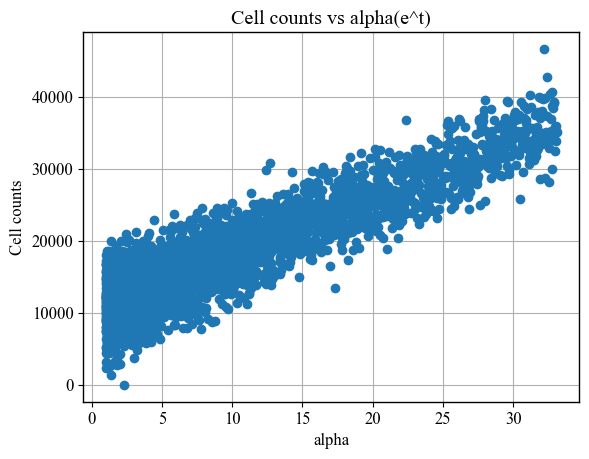

In [3]:
beta  = data['Cell volume(nL)'].to_numpy() # tasa de cambio de volumen celular
y = data['Cell counts'].to_numpy() # numero de celulas


# Transformar Time(h) a alpha
alpha = []
# alpha = np.zeros(len(data['Time(h)']))
for element in data['Time(h)'].to_numpy():
    # print(element)
    e_t = np.exp(element)
    alpha.append(e_t)

alpha = np.array(alpha, dtype=np.float64)


# Graficar
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1
plt.title('Cell counts vs alpha(e^t)')
plt.plot(alpha, y, 'o')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.grid(True)


Se ve una clara tendencia lineal en los datos

#  2. Separe su conjunto de datos

Realice un hold-out de 70%-30% (No use Sklearn).Grafique ambas conjuntos. ¿La tendencia es igual en ambos casos?

**Este punto solo será válido si se considera el balanceo durante el particionamiento.**


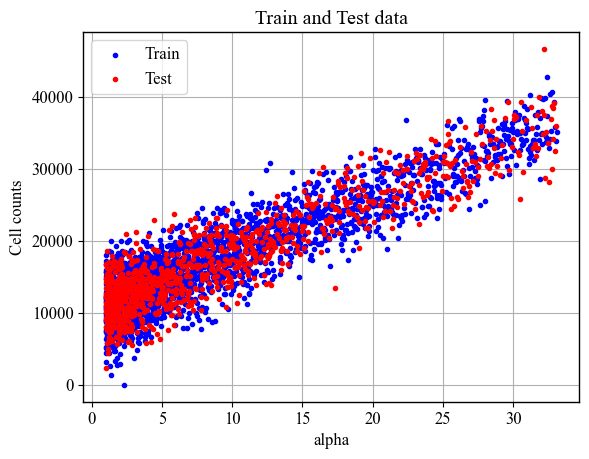

In [4]:
data_size = len(y)
index =np.arange(0, data_size, 1)
np.random.seed(43)
np.random.shuffle(index)
seventy_percent = int(data_size*0.7)
train_index = index[0:seventy_percent]
test_index = index[seventy_percent:]

X_train = alpha[train_index]
X_test = alpha[test_index]
y_train = y[train_index]
y_test = y[test_index]

plt.rcParams['legend.loc'] = "upper left"
plt.title('Train and Test data')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.scatter(X_train, y_train, label='Train', color='blue', marker='.', zorder=3)
plt.scatter(X_test, y_test, label='Test', color='red', marker='.', zorder=3)
plt.legend()
plt.grid(True)

# 3. Proponga un modelo

Proponga un modelo para la estimación de crecimiento celular, Justifique su elección.

**recuerde los 5 criterios de Gauss-Markov, ¿su modelo lo cumple?**

y = b_0 + b_1 * a

### **Criterio de la Linealidad**

- La linealidad indica que los parametros deben tener una tendencia lineal. Esto se puede observar en el primer punto, done efectivamente se presenta una tendencia lineal

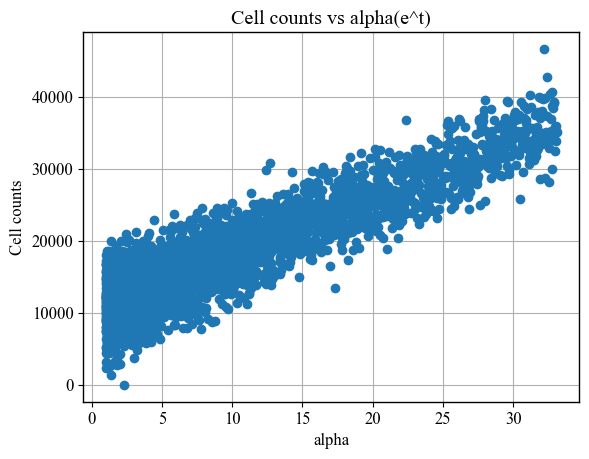

In [5]:
plt.title('Cell counts vs alpha(e^t)')
plt.plot(alpha, y, 'o')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.grid(True)


#### **Criterio de la Multicolinealidad**

- Las columnas deben ser independientes la una de la otra, es decir que una columna no pueda ser una combinacion lineal de la otra (dependientes)

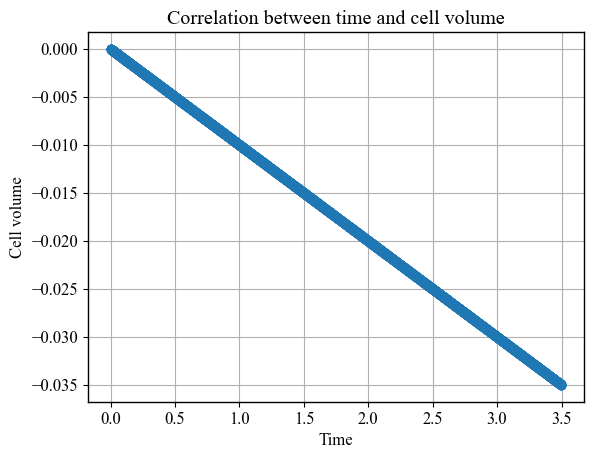

In [6]:
time = data['Time(h)'].to_numpy()
cell_volume = data['Cell volume(nL)'].to_numpy()

# Correlacion entre las variables
plt.title('Correlation between time and cell volume')
plt.scatter(time, cell_volume , zorder=3)
plt.xlabel('Time')
plt.ylabel('Cell volume')
plt.grid(True)


Se evidencia una fuerte correlacion entre las caracteristicas (columnas) de time y cell volume. Por lo tanto podemos quitar una del modelo, en este caso quitaremos Cell Volume

### **Criterio de la Homocedasticidad**

- En este caso, este criterio no se cumple, en el punto 2 podemos observar como la varianza depende de X, debido a que en X con valores bajos presenta una varianza distinta a los X con valores altos.

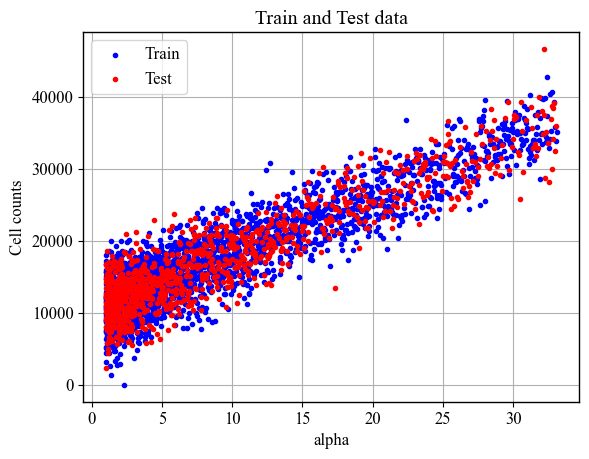

In [7]:

plt.title('Train and Test data')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.scatter(X_train, y_train, label='Train', color='blue', marker='.', zorder=3)
plt.scatter(X_test, y_test, label='Test', color='red', marker='.', zorder=3)
plt.legend()
plt.grid(True)

### **Modelo**

In [8]:
X_train = np.array(X_train).reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

[785.28620724]


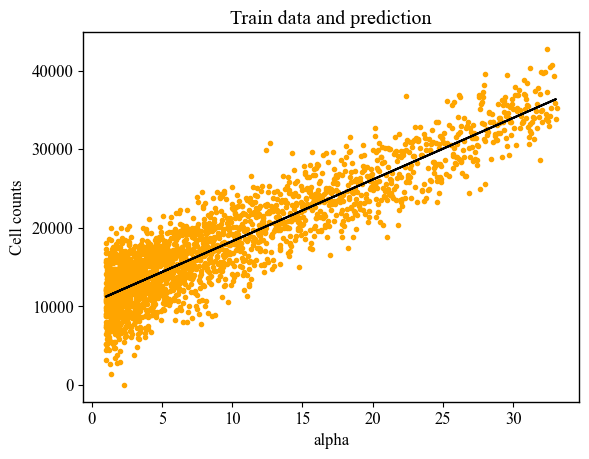

In [51]:
print(reg.coef_) # Pendiente -> beta

X_test = np.array(X_test).reshape(-1, 1)
y_ = reg.predict(X_test) # Prediccion


plt.title('Train data and prediction')
plt.xlabel('alpha')
plt.ylabel('Cell counts')
plt.scatter(X_train, y_train, label='Train', color='orange', marker='.', zorder=3)
plt.plot(X_test, y_, color='black', label='Prediction', zorder=3)

In [54]:
cov = np.std(y_train) * np.linalg.inv(X_train.T@X_train)
var = np.diag(cov)
std = var**0.5
z = reg.coef_/std
p = 2 * norm.sf(np.abs(z))
print(p<0.05)

[ True]


### **Criterio de Residuos**

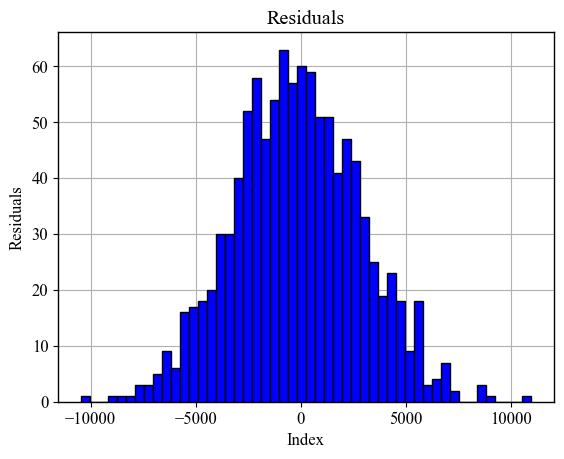

In [55]:
residuos = y_test - y_
plt.title('Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)
residuos_hist = plt.hist(residuos, bins=50, color='blue', edgecolor='black', zorder=3)


Podemos ver como los residuos siguen una distribucion normal, por lo tanto se cumple el criterio de residuos

# 4. Evalue su modelo

Seleccione una métrica de evaluación, justifique su respuesta. ¿Esta métrica demuestra que su modelo obtiene un buen ajuste?

### r2

R2: 0.8371345861968028


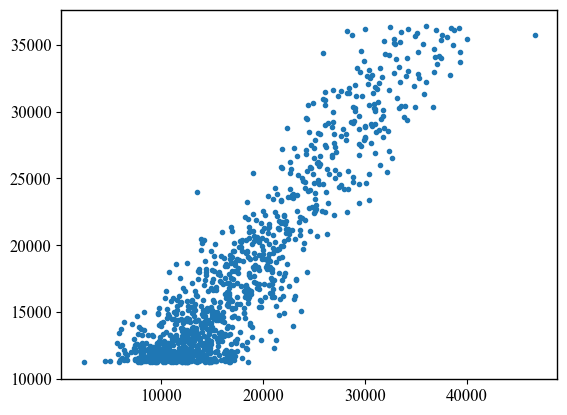

In [33]:
r2 = r2_score(y_test, y_)
print('R2:', r2)
plt.plot(y_test,y_,'.')

Un r2 de 0.84 aproximadamente indica que un 84% de los datos estan cercanos a la tendencia real. 

### MAE

In [39]:
mae = mean_absolute_error(y_test, y_)
print('MAE:', mae)

MAE: 2414.168250755671


In [56]:
y_test.min(), y_test.max()

(np.float64(2409.956818573016), np.float64(46693.79452134089))

#### Proporcion del MAE

In [58]:
MAE_proporional = mae/(y_test.max()-y_test.min()) * 100
print('MAE Proporcional:', MAE_proporional)

MAE Proporcional: 5.451578670664261


Al tratar con valores que se encuentran entre 2410 - 46700 tener un MAE de 2414.16 no afecta tan significativamente al modelo. Esto puede verse reflejado a la hora de calcular la proporcion del MAE, indicando que en promedio, el error absoluto es alrededor del 5.45% en el rango total de los datos.

### MSE

In [62]:
mse = mean_squared_error(y_test, y_)
print('MSE:', mse)


MSE: 9146705.955498518


El MSE da un valor ABSURDAMENTE elevado, esto se puede deber a que no se cumplio el criterio de la Homocedasticidad. El MSE es sensible cuando las varianzas no son constantes y dependen de X.

- En áreas donde la varianza es mayor, los errores pueden ser mucho más grandes, y como el MSE penaliza de forma cuadrática los errores grandes, el efecto se magnifica.
- En áreas donde la varianza es baja, los errores son pequeños, pero el MSE no se equilibra de forma adecuada debido a la dependencia desigual de la varianza.